In [ ]:
pip install umap-learn

In [ ]:
pip install umap

#Unpacking and encoding dataframe#

In [ ]:
import pandas as pd

# Reading data from csv
df = pd.read_csv("ecoli.data", sep="\s+", names=["Sequence name",  "mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2", "class"])

In [ ]:
df

,Sequence name,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


In [ ]:
from itertools import count
import seaborn as sns
import umap.umap_ as umap
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

df_one_hot = pd.get_dummies(df, columns=["Sequence name"])

le = LabelEncoder()
df_one_hot["class"] = le.fit_transform(df["class"])

df_one_hot

,mcg,gvh,lip,chg,aac,alm1,alm2,class,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,...,Sequence name_USHA_ECOLI,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,7,0,0,...,0,0,0,0,0,0,0,0,0,0
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,7,0,0,...,0,0,0,0,0,0,0,0,0,0
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,7,0,0,...,1,0,0,0,0,0,0,0,0,0
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,7,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Counting amount of each class
df_one_hot["class"].value_counts()

0    143
1     77
7     52
4     35
5     20
6      5
3      2
2      2
Name: class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Separating original data on test and train
X_train_og, X_test_og, y_train_og, y_test_og = train_test_split(df_one_hot.loc[:, df_one_hot.columns != "class"], df_one_hot["class"],
                                                    test_size=0.3, shuffle=True)


# SVM
X_test_svm_og = X_test_og
y_test_svm_og = y_test_og

# KNN
X_test_knn_og = X_test_og
y_test_knn_og = y_test_og

# RF
X_test_rf_og = X_test_og
y_test_rf_og = y_test_og

#Functions section#

T-SNE

In [ ]:
def t_sne_draw(encoded_dataframe, n_components, perplexity, angle):
  X_embedded = TSNE(n_components=n_components, perplexity=perplexity, angle=angle).fit_transform(encoded_dataframe)
  X, Y = X_embedded[:, 0], X_embedded[:, 1]
  sns.scatterplot(x=X, y=Y, hue=encoded_dataframe["class"], palette="deep")

UMAP

In [ ]:
def umap_draw(encoded_dataframe, n_components, n_neighbors, min_dist):
  reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components, metric='euclidean')
  embedding = reducer.fit_transform(encoded_dataframe)
  X_umap, Y_umap = embedding[:, 0], embedding[:, 1]
  sns.scatterplot(x=X_umap, y=Y_umap, hue=encoded_dataframe["class"], palette="deep")

#Resampling data using SMOTE#

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42, k_neighbors=1, n_jobs=4, sampling_strategy="not majority")
X_smote, y_sm = sm.fit_resample(df_one_hot.loc[:, df_one_hot.columns != "class"], df_one_hot["class"])

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [ ]:
# Merging X and y into one dataframe
y_smote = pd.DataFrame(y_sm)
y_smote.reset_index(drop=True, inplace=True)
df_smote = pd.concat([X_smote, y_smote], axis=1)
df_smote

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class
0,0.490000,0.290000,0.48,0.5,0.560000,0.240000,0.350000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.070000,0.400000,0.48,0.5,0.540000,0.350000,0.440000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.560000,0.400000,0.48,0.5,0.490000,0.370000,0.460000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.590000,0.490000,0.48,0.5,0.520000,0.450000,0.360000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.230000,0.320000,0.48,0.5,0.550000,0.250000,0.350000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,0.660161,0.679839,0.48,0.5,0.615080,0.440214,0.400054,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1140,0.755882,0.732574,0.48,0.5,0.439485,0.392574,0.391544,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1141,0.632786,0.854427,0.48,0.5,0.384427,0.464427,0.356719,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1142,0.734496,0.747339,0.48,0.5,0.316421,0.541008,0.523669,0,0,0,...,0,0,0,0,0,0,0,0,0,7


In [ ]:
# Counting amount of each class
df_smote["class"].value_counts()

0    143
1    143
3    143
2    143
4    143
5    143
6    143
7    143
Name: class, dtype: int64

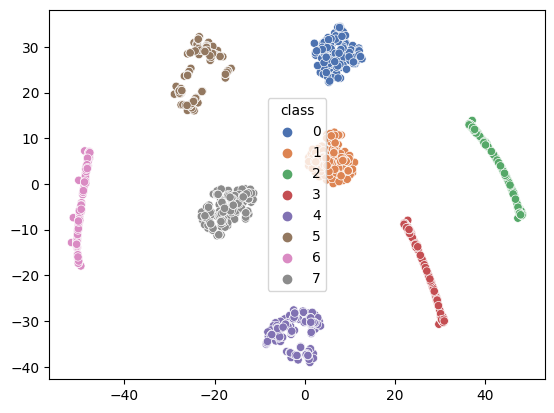

In [ ]:
# Plottimg resampled values using T-SNE
t_sne_draw(df_smote, 2, 30, 0.6)

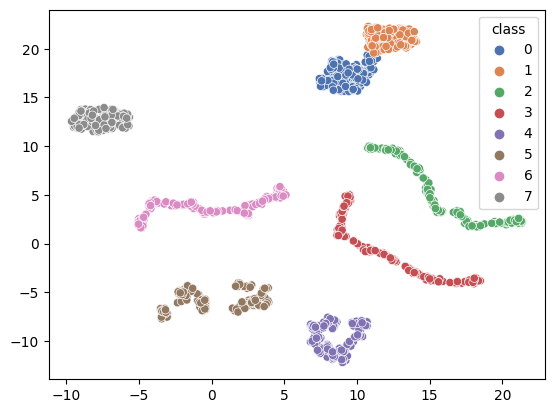

In [ ]:
# Plottimg resampled values using UMAP
umap_draw(df_smote, 2, 30, 0.6)

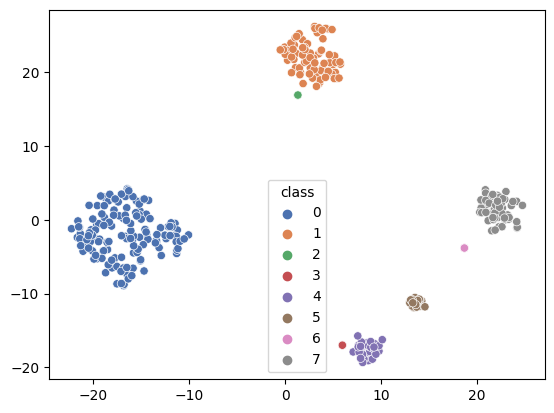

In [ ]:
# Plottimg original values using T-SNE
t_sne_draw(df_one_hot, 2, 30, 0.6)

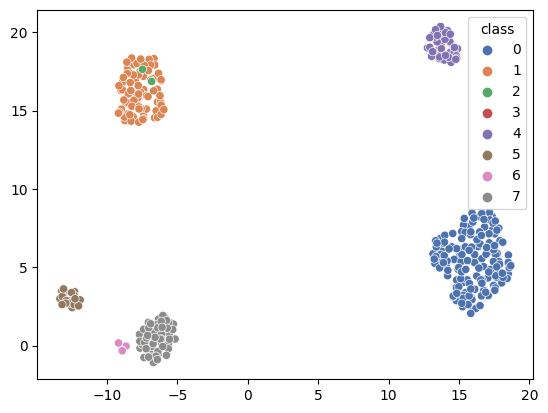

In [ ]:
# Plottimg original values using UMAP
umap_draw(df_one_hot, 2, 20, 0.6)

#Grid search for SVM classifier with SMOTE resampling#

Searching for best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [ ]:
# Separating sampled data on test and train
X_train, X_test, y_train, y_test = train_test_split(df_smote.loc[:, df_smote.columns != "class"], df_smote["class"],
                                                    test_size=0.3, shuffle=True)


# SVM
X_test_svm = X_test
y_test_svm = y_test

# KNN
X_test_knn = X_test
y_test_knn = y_test

# RF
X_test_rf = X_test
y_test_rf = y_test

In [ ]:
parameters = {"kernel":("linear", "rbf", "sigmoid", "poly"), "C":list(range(1, 11)), "class_weight": [None, "balanced"]}
scoring = ['accuracy','f1_macro', 'recall']
svc = svm.SVC()

In [ ]:
clf = GridSearchCV(svc, parameters, n_jobs=4, verbose=3, refit=False, cv=2)

In [ ]:
clf.fit(X_train, y_train)

Fitting 2 folds for each of 80 candidates, totalling 160 fits


GridSearchCV(cv=2, estimator=SVC(), n_jobs=4,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'class_weight': [None, 'balanced'],
                         'kernel': ('linear', 'rbf', 'sigmoid', 'poly')},
             refit=False, verbose=3)

In [ ]:
clf.best_params_

{'C': 6, 'class_weight': 'balanced', 'kernel': 'rbf'}

Training using best parameters according to Grid search

In [ ]:
# Creating and training classifier with linear kernel
clf = svm.SVC(**clf.best_params_)
clf.fit(X_train, y_train)

SVC(C=6, class_weight='balanced')

Testing on sampled data

In [ ]:
# Predicting values
pred_test_svm = clf.predict(X_test_svm)

In [ ]:
pred_svm = pd.Series(pred_test_svm, name="class")

In [ ]:
# Making dataframe from predicted values
X_test_svm.reset_index(drop=True, inplace=True)
y_pred_svm = pd.DataFrame(pred_svm)
df_svm = pd.concat([X_test_svm, y_pred_svm], axis=1)
df_svm

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class
0,0.672671,0.490000,1.00,0.5,0.590682,0.553665,0.309318,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,0.551637,0.707179,0.48,0.5,0.759546,0.364181,0.435365,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,0.695826,0.626696,0.48,0.5,0.589219,0.503304,0.421652,0,0,0,...,0,0,0,0,0,0,0,0,0,7
3,0.679531,0.492816,1.00,0.5,0.621877,0.551408,0.274369,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,0.530000,0.380000,0.48,0.5,0.440000,0.260000,0.360000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0.681385,0.477169,1.00,0.5,0.531446,0.572831,0.334338,0,0,0,...,0,0,0,0,0,0,0,0,0,6
340,0.663158,0.496029,0.48,0.5,0.538493,0.723828,0.723684,0,0,0,...,0,0,0,0,0,0,0,0,0,3
341,0.670000,0.878617,0.48,0.5,0.730346,0.501383,0.254150,0,0,0,...,0,0,0,0,0,0,0,0,0,5
342,0.850000,0.530000,0.48,0.5,0.530000,0.520000,0.350000,0,0,0,...,0,0,0,0,0,0,0,0,0,7


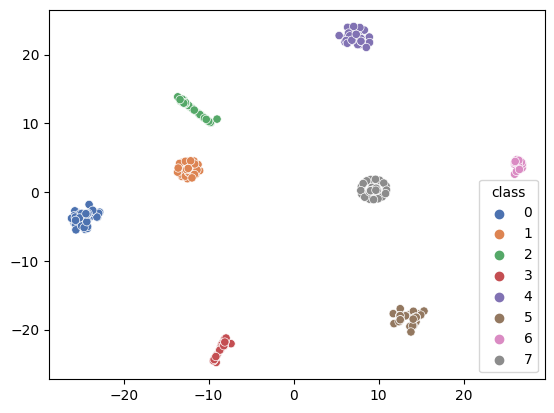

In [ ]:
# Plottimg predicted resampled values using T-SNE
t_sne_draw(df_svm, 2, 30, 0.6)

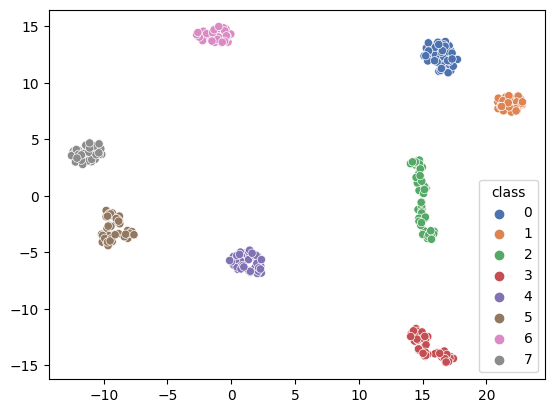

In [ ]:
# Plottimg predicted resampled values using UMAP
umap_draw(df_svm, 2, 30, 0.6)

In [ ]:
# Making dataframe from training values
X_test.reset_index(drop=True, inplace=True)
y_test_ = pd.DataFrame(y_test)
y_test_.reset_index(drop=True, inplace=True)
df_test = pd.concat([X_test, y_test_], axis=1)
df_test

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class
0,0.672671,0.490000,1.00,0.5,0.590682,0.553665,0.309318,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,0.551637,0.707179,0.48,0.5,0.759546,0.364181,0.435365,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,0.695826,0.626696,0.48,0.5,0.589219,0.503304,0.421652,0,0,0,...,0,0,0,0,0,0,0,0,0,7
3,0.679531,0.492816,1.00,0.5,0.621877,0.551408,0.274369,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,0.530000,0.380000,0.48,0.5,0.440000,0.260000,0.360000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0.681385,0.477169,1.00,0.5,0.531446,0.572831,0.334338,0,0,0,...,0,0,0,0,0,0,0,0,0,6
340,0.663158,0.496029,0.48,0.5,0.538493,0.723828,0.723684,0,0,0,...,0,0,0,0,0,0,0,0,0,3
341,0.670000,0.878617,0.48,0.5,0.730346,0.501383,0.254150,0,0,0,...,0,0,0,0,0,0,0,0,0,5
342,0.850000,0.530000,0.48,0.5,0.530000,0.520000,0.350000,0,0,0,...,0,0,0,0,0,0,0,0,0,3


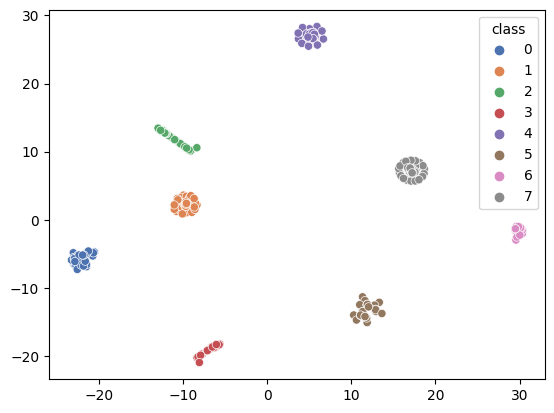

In [ ]:
# Plottimg test resampled values using T-SNE
t_sne_draw(df_test, 2, 30, 0.6)

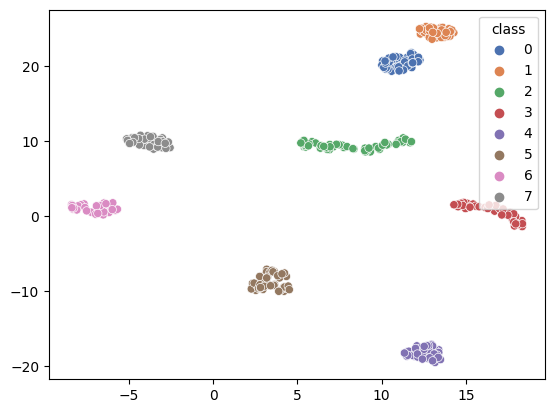

In [ ]:
# Plottimg test resampled values using UMAP
umap_draw(df_test, 2, 30, 0.6)

Testing on original data

In [ ]:
# Predicting values
pred_test_svm = clf.predict(X_test_svm_og)

In [ ]:
pred_svm = pd.Series(pred_test_svm, name="class")

In [ ]:
print(f1_score(pred_test_svm, y_test_svm_og, average="micro"))

0.9603960396039604


In [ ]:
# Making dataframe from predicted values
X_test_svm_og.reset_index(drop=True, inplace=True)
y_pred_svm_og = pd.DataFrame(pred_svm)
df_svm_og = pd.concat([X_test_svm_og, y_pred_svm_og], axis=1)
df_svm_og

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class
0,0.70,0.53,0.48,0.5,0.70,0.86,0.87,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0.40,0.42,0.48,0.5,0.37,0.27,0.27,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.34,0.28,0.48,0.5,0.41,0.35,0.44,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.16,0.51,0.48,0.5,0.33,0.39,0.48,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.72,0.42,0.48,0.5,0.65,0.77,0.79,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.78,0.33,0.48,0.5,0.57,0.77,0.79,0,0,0,...,0,0,0,0,0,0,0,0,0,4
97,0.25,0.37,0.48,0.5,0.43,0.26,0.36,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0.74,0.70,0.48,0.5,0.66,0.65,0.69,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99,0.50,0.57,0.48,0.5,0.71,0.61,0.66,0,0,0,...,0,0,0,0,0,0,0,0,0,1


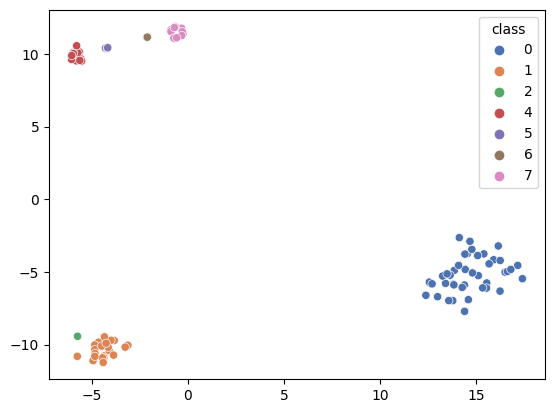

In [ ]:
# Plottimg test original values using T-SNE
t_sne_draw(df_svm_og, 2, 20, 0.6)

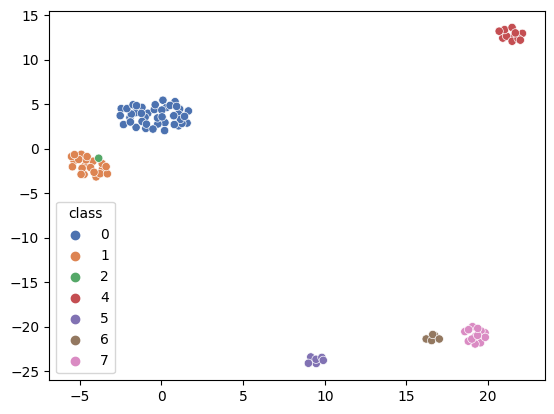

In [ ]:
# Plottimg test original values using UMAP
umap_draw(df_svm_og, 2, 20, 0.6)

#Grid search for KNN classifier with SMOTE resampling#

Searching for best parameters

In [ ]:
parameters = {"n_neighbors":list(range(5, 30)), "algorithm":("brute", "kd_tree", "ball_tree"),
              "metric":["minkowski", "manhattan", "euclidean"]}

kneigh = KNeighborsClassifier()

In [ ]:
neigh = GridSearchCV(kneigh, parameters, n_jobs=4, verbose=3, refit=False, cv=2)

In [ ]:
neigh.fit(X_train, y_train)

Fitting 2 folds for each of 225 candidates, totalling 450 fits


GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'algorithm': ('brute', 'kd_tree', 'ball_tree'),
                         'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                         26, 27, 28, 29]},
             refit=False, verbose=3)

In [ ]:
neigh.best_params_

{'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 5}

Training using best parameters according to Grid search

In [ ]:
neigh = KNeighborsClassifier(**neigh.best_params_)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute')

Testing on sampled data

In [ ]:
# Predicting values
pred_neigh = neigh.predict(X_test_knn)

In [ ]:
pred_knn = pd.Series(pred_neigh, name="class")

In [ ]:
# Making dataframe from predicted values
X_test_knn.reset_index(drop=True, inplace=True)
y_pred_knn = pd.DataFrame(pred_knn)
df_knn = pd.concat([X_test_knn, y_pred_knn], axis=1)
df_knn

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class
0,0.672671,0.490000,1.00,0.5,0.590682,0.553665,0.309318,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,0.551637,0.707179,0.48,0.5,0.759546,0.364181,0.435365,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,0.695826,0.626696,0.48,0.5,0.589219,0.503304,0.421652,0,0,0,...,0,0,0,0,0,0,0,0,0,7
3,0.679531,0.492816,1.00,0.5,0.621877,0.551408,0.274369,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,0.530000,0.380000,0.48,0.5,0.440000,0.260000,0.360000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0.681385,0.477169,1.00,0.5,0.531446,0.572831,0.334338,0,0,0,...,0,0,0,0,0,0,0,0,0,6
340,0.663158,0.496029,0.48,0.5,0.538493,0.723828,0.723684,0,0,0,...,0,0,0,0,0,0,0,0,0,3
341,0.670000,0.878617,0.48,0.5,0.730346,0.501383,0.254150,0,0,0,...,0,0,0,0,0,0,0,0,0,5
342,0.850000,0.530000,0.48,0.5,0.530000,0.520000,0.350000,0,0,0,...,0,0,0,0,0,0,0,0,0,7


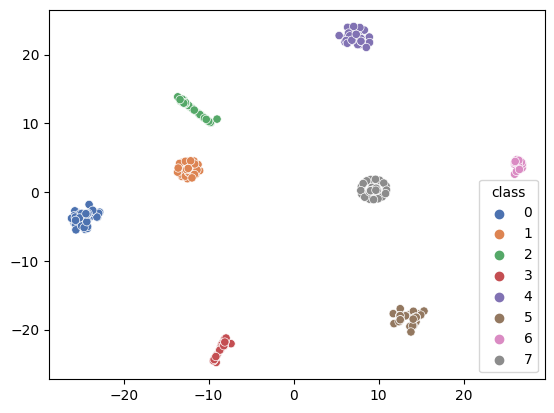

In [ ]:
# Plottimg predicted resampled values using T-SNE
t_sne_draw(df_knn, 2, 30, 0.6)

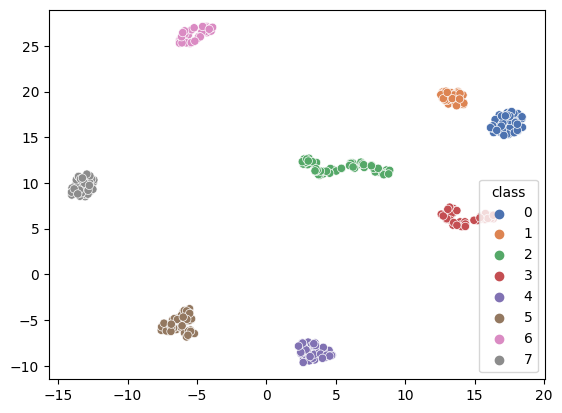

In [ ]:
# Plottimg predicted resampled values using UMAP
umap_draw(df_knn, 2, 30, 0.6)

Testing on original data

In [ ]:
# Predicting values
pred_neigh = clf.predict(X_test_knn_og)

In [ ]:
pred_knn = pd.Series(pred_neigh, name="class")

In [ ]:
print(f1_score(pred_neigh, y_test_knn_og, average="micro"))

0.9603960396039604


In [ ]:
# Making dataframe from predicted values
X_test_knn_og.reset_index(drop=True, inplace=True)
y_pred_knn_og = pd.DataFrame(pred_knn)
df_knn_og = pd.concat([X_test_knn_og, y_pred_knn_og], axis=1)
df_knn_og

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class
0,0.70,0.53,0.48,0.5,0.70,0.86,0.87,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0.40,0.42,0.48,0.5,0.37,0.27,0.27,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.34,0.28,0.48,0.5,0.41,0.35,0.44,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.16,0.51,0.48,0.5,0.33,0.39,0.48,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.72,0.42,0.48,0.5,0.65,0.77,0.79,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.78,0.33,0.48,0.5,0.57,0.77,0.79,0,0,0,...,0,0,0,0,0,0,0,0,0,4
97,0.25,0.37,0.48,0.5,0.43,0.26,0.36,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0.74,0.70,0.48,0.5,0.66,0.65,0.69,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99,0.50,0.57,0.48,0.5,0.71,0.61,0.66,0,0,0,...,0,0,0,0,0,0,0,0,0,1


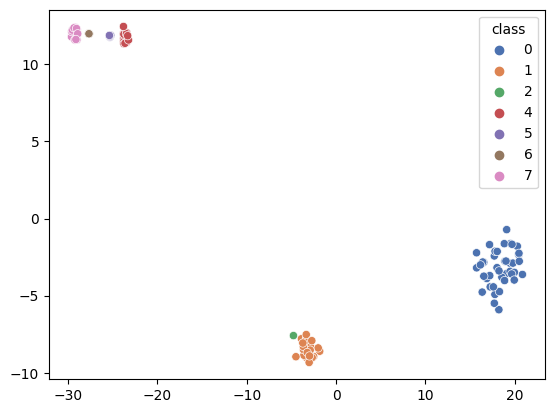

In [ ]:
# Plottimg predicted original values using T-SNE
t_sne_draw(df_knn_og, 2, 20, 0.6)

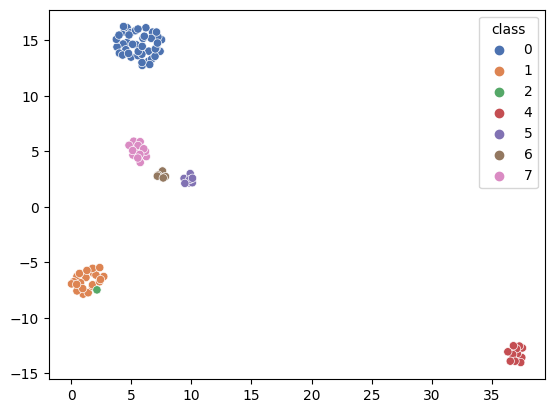

In [ ]:
# Plottimg predicted original values using UMAP
umap_draw(df_knn_og, 2, 20, 0.6)

#Grid search for RF classifier with SMOTE resampling#

Searching for best parameters

In [ ]:
parameters = {"n_estimators":list(range(100, 200, 25)), "criterion":("gini", "entropy", "log_loss"), "max_depth":list(range(3, 6))}
rf = RandomForestClassifier()

In [ ]:
rfc = GridSearchCV(rf, parameters, n_jobs=4, verbose=3, refit=False, cv=2)

In [ ]:
rfc.fit(X_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 125, 150, 175]},
             refit=False, verbose=3)

In [ ]:
rfc.best_params_

{'criterion': 'log_loss', 'max_depth': 5, 'n_estimators': 175}

Training using best parameters according to Grid search

In [ ]:
rfc = RandomForestClassifier(**rfc.best_params_)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=5, n_estimators=175)

Testing on resampled data

In [ ]:
# Predicting values
pred_test_rf = clf.predict(X_test_rf)

In [ ]:
pred_rf = pd.Series(pred_test_rf, name="class")

In [ ]:
# Making dataframe from predicted values
X_test_rf.reset_index(drop=True, inplace=True)
y_pred_rf = pd.DataFrame(pred_rf)
df_rf = pd.concat([X_test_rf, y_pred_rf], axis=1)
df_rf

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class
0,0.672671,0.490000,1.00,0.5,0.590682,0.553665,0.309318,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,0.551637,0.707179,0.48,0.5,0.759546,0.364181,0.435365,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,0.695826,0.626696,0.48,0.5,0.589219,0.503304,0.421652,0,0,0,...,0,0,0,0,0,0,0,0,0,7
3,0.679531,0.492816,1.00,0.5,0.621877,0.551408,0.274369,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,0.530000,0.380000,0.48,0.5,0.440000,0.260000,0.360000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0.681385,0.477169,1.00,0.5,0.531446,0.572831,0.334338,0,0,0,...,0,0,0,0,0,0,0,0,0,6
340,0.663158,0.496029,0.48,0.5,0.538493,0.723828,0.723684,0,0,0,...,0,0,0,0,0,0,0,0,0,3
341,0.670000,0.878617,0.48,0.5,0.730346,0.501383,0.254150,0,0,0,...,0,0,0,0,0,0,0,0,0,5
342,0.850000,0.530000,0.48,0.5,0.530000,0.520000,0.350000,0,0,0,...,0,0,0,0,0,0,0,0,0,7


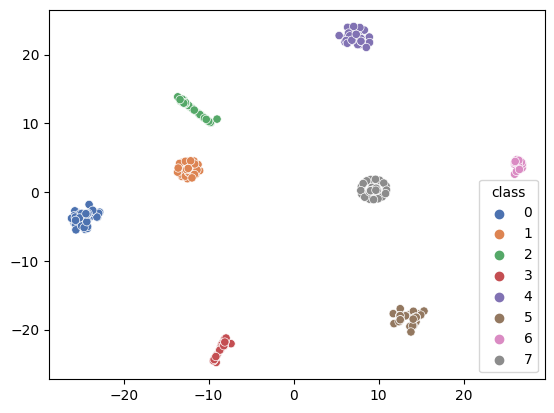

In [ ]:
# Plottimg predicted resampled values using T-SNE
t_sne_draw(df_rf, 2, 30, 0.6)

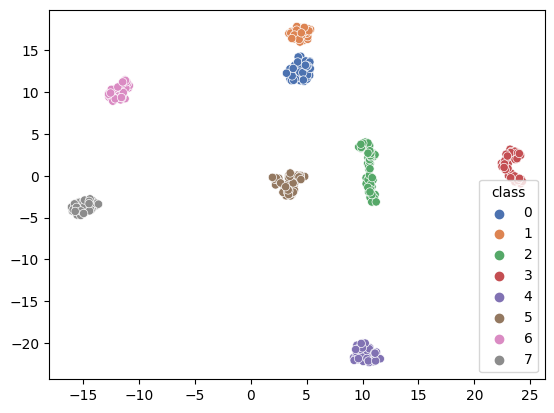

In [ ]:
# Plottimg predicted resampled values using UMAP
umap_draw(df_rf, 2, 30, 0.6)

Testing on original data

In [ ]:
# Predicting values
pred_test_rf = clf.predict(X_test_rf_og)

In [ ]:
pred_rf = pd.Series(pred_test_rf, name="class")

In [ ]:
print(f1_score(pred_test_rf, y_test_rf_og, average="micro"))

0.9603960396039604


In [ ]:
# Making dataframe from predicted values
X_test_rf_og.reset_index(drop=True, inplace=True)
y_pred_rf_og = pd.DataFrame(pred_rf)
df_rf_og = pd.concat([X_test_rf_og, y_pred_rf_og], axis=1)
df_rf_og

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class
0,0.70,0.53,0.48,0.5,0.70,0.86,0.87,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0.40,0.42,0.48,0.5,0.37,0.27,0.27,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.34,0.28,0.48,0.5,0.41,0.35,0.44,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.16,0.51,0.48,0.5,0.33,0.39,0.48,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.72,0.42,0.48,0.5,0.65,0.77,0.79,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.78,0.33,0.48,0.5,0.57,0.77,0.79,0,0,0,...,0,0,0,0,0,0,0,0,0,4
97,0.25,0.37,0.48,0.5,0.43,0.26,0.36,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0.74,0.70,0.48,0.5,0.66,0.65,0.69,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99,0.50,0.57,0.48,0.5,0.71,0.61,0.66,0,0,0,...,0,0,0,0,0,0,0,0,0,1


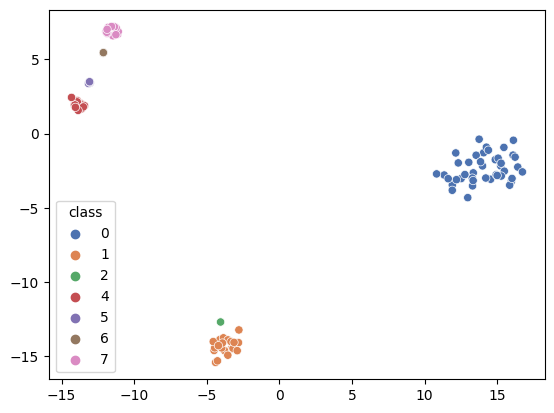

In [ ]:
# Plottimg predicted original values using T-SNE
t_sne_draw(df_rf_og, 2, 20, 0.6)

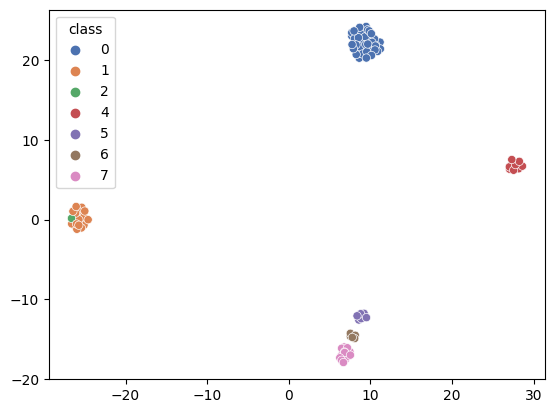

In [ ]:
# Plottimg predicted original values using UMAP
umap_draw(df_rf_og, 2, 20, 0.6)

#Resampling data using Borderline SMOTE-1#

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

In [ ]:
bsm = BorderlineSMOTE(sampling_strategy="not majority", random_state=42, k_neighbors=1, n_jobs=4, m_neighbors=2, kind="borderline-1")
X_bsm, y_bsm = bsm.fit_resample(df_one_hot.loc[:, df_one_hot.columns != "class"], df_one_hot["class"])

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/filter.py:192: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [ ]:
y_border_smote = pd.DataFrame(y_bsm)
y_border_smote.reset_index(drop=True, inplace=True)
df_border_smote = pd.concat([X_bsm, y_border_smote], axis=1)
df_border_smote

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class
0,0.490000,0.290000,0.48,0.5,0.560000,0.240000,0.350000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.070000,0.400000,0.48,0.5,0.540000,0.350000,0.440000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.560000,0.400000,0.48,0.5,0.490000,0.370000,0.460000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.590000,0.490000,0.48,0.5,0.520000,0.450000,0.360000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.230000,0.320000,0.48,0.5,0.550000,0.250000,0.350000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,0.628182,0.809545,0.48,0.5,0.476364,0.360000,0.391818,0,0,0,...,0,0,0,0,0,0,0,0,0,7
720,0.696776,0.622897,0.48,0.5,0.582570,0.507103,0.423551,0,0,0,...,0,0,0,0,0,0,0,0,0,7
721,0.620332,0.829171,0.48,0.5,0.460664,0.360000,0.399668,0,0,0,...,0,0,0,0,0,0,0,0,0,7
722,0.699274,0.795363,0.48,0.5,0.559516,0.499758,0.269033,0,0,0,...,0,0,0,0,0,0,0,0,0,7


In [ ]:
# Counting amount of each class
df_border_smote["class"].value_counts()

0    143
1    143
4    143
5    143
7    143
6      5
3      2
2      2
Name: class, dtype: int64

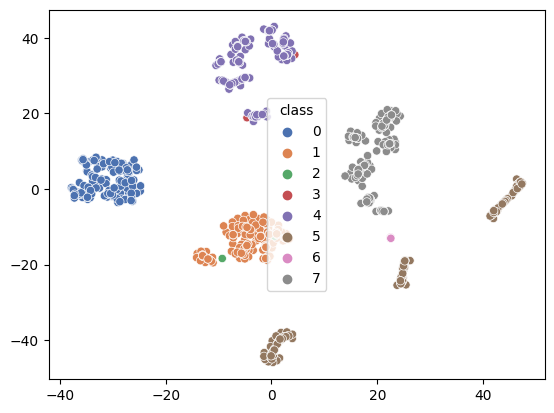

In [ ]:
# Plottimg resampled values using T-SNE
t_sne_draw(df_border_smote, 2, 20, 0.6)

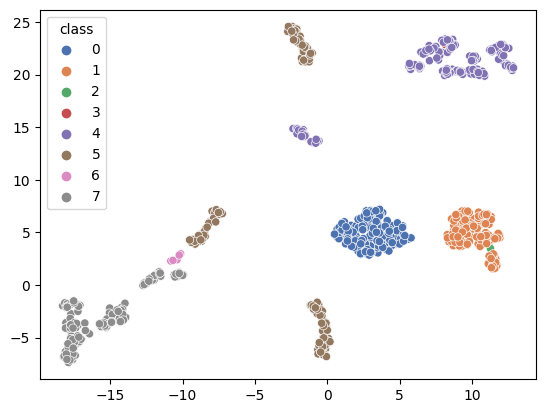

In [ ]:
# Plottimg resampled values using UMAP
umap_draw(df_border_smote, 2, 20, 0.6)

#Grid search for SVM classifier with Borderline SMOTE-1 resampling#

Searching for best parameters

In [ ]:
# Separating on test and train
X_train, X_test, y_train, y_test = train_test_split(df_border_smote.loc[:, df_border_smote.columns != "class"], df_border_smote["class"],
                                                    test_size=0.3, shuffle=True)


# SVM
X_test_svm = X_test
y_test_svm = y_test

# KNN
X_test_knn = X_test
y_test_knn = y_test

# RF
X_test_rf = X_test
y_test_rf = y_test

In [ ]:
parameters = {"kernel":("linear", "rbf", "sigmoid", "poly"), "C":list(range(1, 11)), "class_weight": [None, "balanced"]}
scoring = ['accuracy','f1_macro', 'recall']
svc = svm.SVC()

In [ ]:
clf = GridSearchCV(svc, parameters, n_jobs=4, verbose=3, refit=False, cv=2)

In [ ]:
clf.fit(X_train, y_train)

Fitting 2 folds for each of 80 candidates, totalling 160 fits


GridSearchCV(cv=2, estimator=SVC(), n_jobs=4,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'class_weight': [None, 'balanced'],
                         'kernel': ('linear', 'rbf', 'sigmoid', 'poly')},
             refit=False, verbose=3)

In [ ]:
clf.best_params_

{'C': 9, 'class_weight': 'balanced', 'kernel': 'poly'}

Training using best parameters according to Grid search

In [ ]:
# Creating and training classifier with linear kernel
clf = svm.SVC(**clf.best_params_)
clf.fit(X_train, y_train)

SVC(C=9, class_weight='balanced', kernel='poly')

Testing on sampled data

In [ ]:
# Predicting values
pred_test_svm = clf.predict(X_test_svm)

In [ ]:
pred_svm = pd.Series(pred_test_svm, name="class")

In [ ]:
# Making dataframe from predicted values
X_test_svm.reset_index(drop=True, inplace=True)
y_pred_svm = pd.DataFrame(pred_svm)
df_svm = pd.concat([X_test_svm, y_pred_svm], axis=1)
df_svm

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class
0,0.571590,0.647197,0.48,0.5,0.465121,0.867439,0.877439,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.670000,0.390000,0.48,0.5,0.360000,0.380000,0.460000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.634619,0.705381,0.48,0.5,0.602309,0.406158,0.391540,0,0,0,...,0,0,0,0,0,0,0,0,0,7
3,0.646634,0.506634,0.48,0.5,0.681878,0.524854,0.321585,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,0.700000,0.710000,0.48,0.5,0.420000,0.840000,0.850000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.510000,0.370000,0.48,0.5,0.350000,0.360000,0.450000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
214,0.360000,0.560000,0.48,0.5,0.430000,0.450000,0.530000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215,0.532974,0.767835,0.48,0.5,0.736217,0.373513,0.402704,0,0,0,...,0,0,0,0,0,0,0,0,0,5
216,0.867426,0.442005,0.48,0.5,0.529431,0.745718,0.746856,0,0,0,...,0,0,0,0,0,0,0,0,0,4


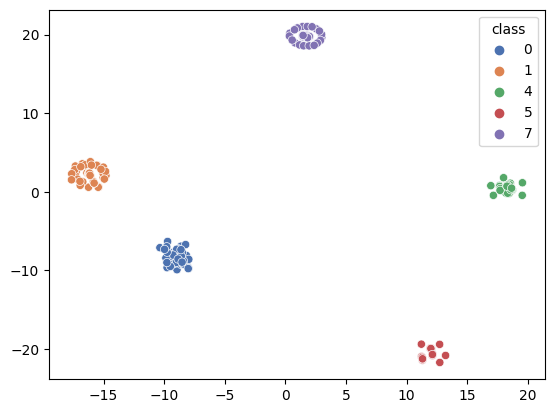

In [ ]:
# Plottimg predicted resampled values using T-SNE
t_sne_draw(df_svm, 2, 30, 0.6)

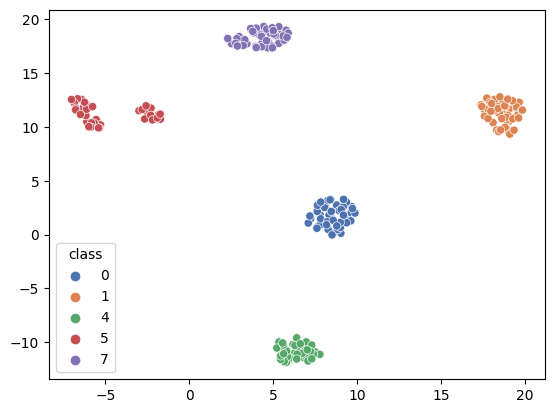

In [ ]:
# Plottimg predicted resampled values using UMAP
umap_draw(df_svm, 2, 30, 0.6)

In [ ]:
# Making dataframe from training values
X_test.reset_index(drop=True, inplace=True)
y_test_ = pd.DataFrame(y_test)
y_test_.reset_index(drop=True, inplace=True)
df_test = pd.concat([X_test, y_test_], axis=1)
df_test

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class
0,0.571590,0.647197,0.48,0.5,0.465121,0.867439,0.877439,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.670000,0.390000,0.48,0.5,0.360000,0.380000,0.460000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.634619,0.705381,0.48,0.5,0.602309,0.406158,0.391540,0,0,0,...,0,0,0,0,0,0,0,0,0,7
3,0.646634,0.506634,0.48,0.5,0.681878,0.524854,0.321585,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,0.700000,0.710000,0.48,0.5,0.420000,0.840000,0.850000,0,0,0,...,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.510000,0.370000,0.48,0.5,0.350000,0.360000,0.450000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
214,0.360000,0.560000,0.48,0.5,0.430000,0.450000,0.530000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215,0.532974,0.767835,0.48,0.5,0.736217,0.373513,0.402704,0,0,0,...,0,0,0,0,0,0,0,0,0,5
216,0.867426,0.442005,0.48,0.5,0.529431,0.745718,0.746856,0,0,0,...,0,0,0,0,0,0,0,0,0,4


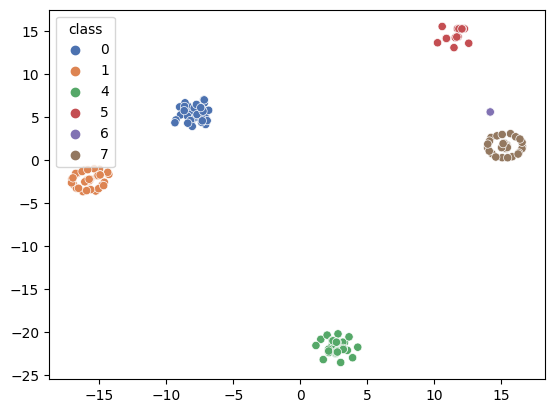

In [ ]:
# Plottimg test resampled values using T-SNE
t_sne_draw(df_test, 2, 30, 0.6)

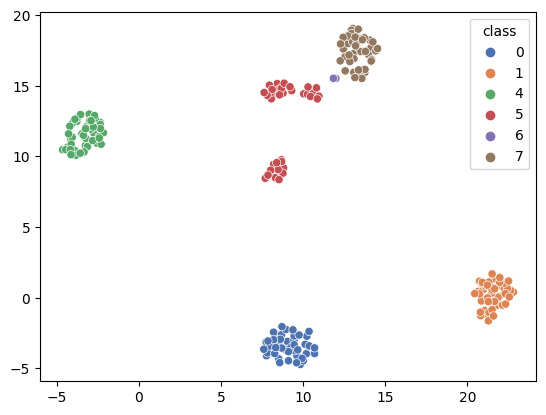

In [ ]:
# Plottimg test resampled values using UMAP
umap_draw(df_test, 2, 30, 0.6)

Testing on original data

In [ ]:
# Predicting values
pred_test_svm = clf.predict(X_test_svm_og)

In [ ]:
pred_svm = pd.Series(pred_test_svm, name="class")

In [ ]:
print(f1_score(pred_test_svm, y_test_svm_og, average="micro"))

0.9504950495049505


In [ ]:
# Making dataframe from predicted values
X_test_svm_og.reset_index(drop=True, inplace=True)
y_pred_svm_og = pd.DataFrame(pred_svm)
df_svm_og = pd.concat([X_test_svm_og, y_pred_svm_og], axis=1)
df_svm_og

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class
0,0.70,0.53,0.48,0.5,0.70,0.86,0.87,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0.40,0.42,0.48,0.5,0.37,0.27,0.27,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.34,0.28,0.48,0.5,0.41,0.35,0.44,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.16,0.51,0.48,0.5,0.33,0.39,0.48,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.72,0.42,0.48,0.5,0.65,0.77,0.79,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.78,0.33,0.48,0.5,0.57,0.77,0.79,0,0,0,...,0,0,0,0,0,0,0,0,0,4
97,0.25,0.37,0.48,0.5,0.43,0.26,0.36,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0.74,0.70,0.48,0.5,0.66,0.65,0.69,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99,0.50,0.57,0.48,0.5,0.71,0.61,0.66,0,0,0,...,0,0,0,0,0,0,0,0,0,1


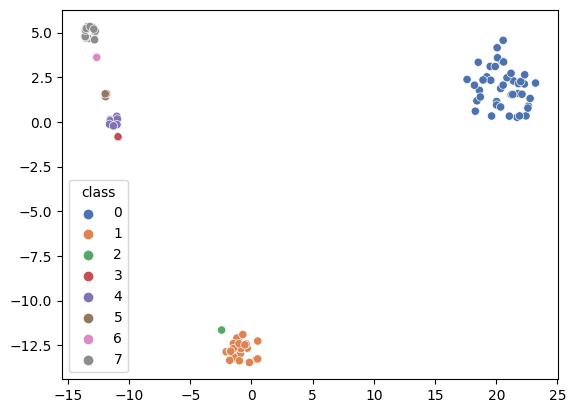

In [ ]:
# Plottimg predicted original values using T-SNE
t_sne_draw(df_svm_og, 2, 20, 0.6)

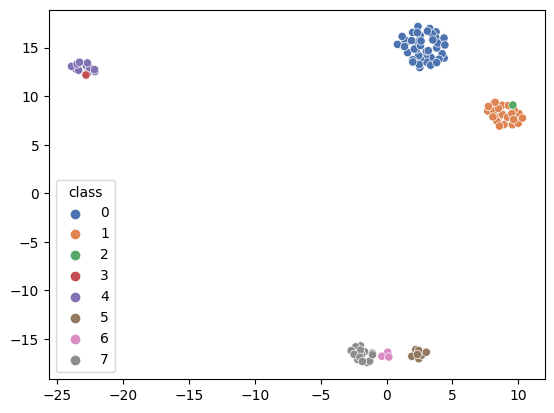

In [ ]:
# Plottimg predicted original values using UMAP
umap_draw(df_svm_og, 2, 20, 0.6)

#Grid search for KNN classifier with Borderline SMOTE-1 resampling#

Searching for best parameters

In [ ]:
parameters = {"n_neighbors":list(range(5, 30)), "algorithm":("brute", "kd_tree", "ball_tree"),
              "metric":["minkowski", "manhattan", "euclidean"]}

kneigh = KNeighborsClassifier()

In [ ]:
neigh = GridSearchCV(kneigh, parameters, n_jobs=4, verbose=3, refit=False, cv=2)

In [ ]:
neigh.fit(X_train, y_train)

Fitting 2 folds for each of 225 candidates, totalling 450 fits


GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'algorithm': ('brute', 'kd_tree', 'ball_tree'),
                         'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                         26, 27, 28, 29]},
             refit=False, verbose=3)

In [ ]:
neigh.best_params_

{'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 5}

Training using best parameters according to Grid search

In [ ]:
neigh = KNeighborsClassifier(**neigh.best_params_)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute')

Testing on sampled data

In [ ]:
# Predicting values
pred_neigh = clf.predict(X_test_knn)

In [ ]:
pred_knn = pd.Series(pred_neigh, name="class")

In [ ]:
# Making dataframe from predicted values
X_test_knn.reset_index(drop=True, inplace=True)
y_pred_knn = pd.DataFrame(pred_knn)
df_knn = pd.concat([X_test_knn, y_pred_knn], axis=1)
df_knn

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class
0,0.571590,0.647197,0.48,0.5,0.465121,0.867439,0.877439,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.670000,0.390000,0.48,0.5,0.360000,0.380000,0.460000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.634619,0.705381,0.48,0.5,0.602309,0.406158,0.391540,0,0,0,...,0,0,0,0,0,0,0,0,0,7
3,0.646634,0.506634,0.48,0.5,0.681878,0.524854,0.321585,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,0.700000,0.710000,0.48,0.5,0.420000,0.840000,0.850000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.510000,0.370000,0.48,0.5,0.350000,0.360000,0.450000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
214,0.360000,0.560000,0.48,0.5,0.430000,0.450000,0.530000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215,0.532974,0.767835,0.48,0.5,0.736217,0.373513,0.402704,0,0,0,...,0,0,0,0,0,0,0,0,0,5
216,0.867426,0.442005,0.48,0.5,0.529431,0.745718,0.746856,0,0,0,...,0,0,0,0,0,0,0,0,0,4


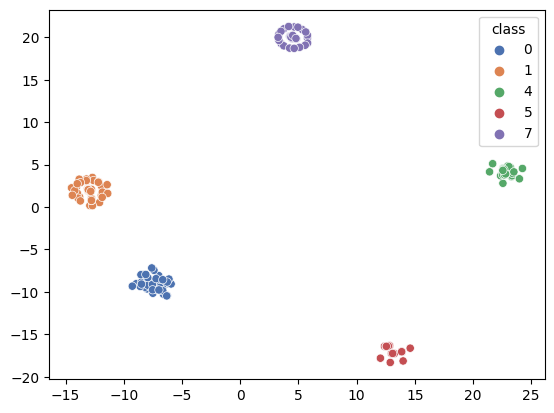

In [ ]:
# Plottimg predicted resampled values using T-SNE
t_sne_draw(df_knn, 2, 30, 0.6)

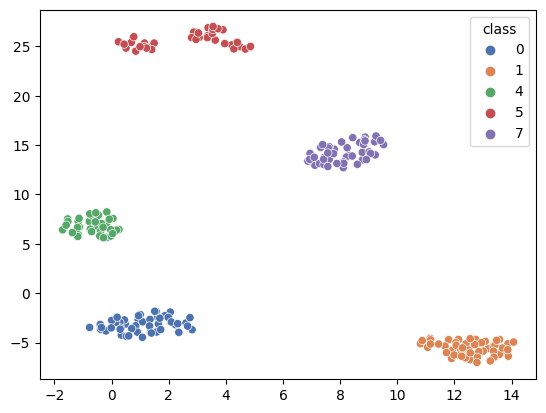

In [ ]:
# Plottimg predicted resampled values using UMAP
umap_draw(df_knn, 2, 30, 0.6)

Testing on original data

In [ ]:
# Predicting values
pred_neigh = clf.predict(X_test_knn_og)

In [ ]:
pred_knn = pd.Series(pred_neigh, name="class")

In [ ]:
print(f1_score(pred_neigh, y_test_knn_og, average="micro"))

0.9504950495049505


In [ ]:
# Making dataframe from predicted values
X_test_knn_og.reset_index(drop=True, inplace=True)
y_pred_knn_og = pd.DataFrame(pred_knn)
df_knn_og = pd.concat([X_test_knn_og, y_pred_knn_og], axis=1)
df_knn_og

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class
0,0.70,0.53,0.48,0.5,0.70,0.86,0.87,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0.40,0.42,0.48,0.5,0.37,0.27,0.27,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.34,0.28,0.48,0.5,0.41,0.35,0.44,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.16,0.51,0.48,0.5,0.33,0.39,0.48,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.72,0.42,0.48,0.5,0.65,0.77,0.79,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.78,0.33,0.48,0.5,0.57,0.77,0.79,0,0,0,...,0,0,0,0,0,0,0,0,0,4
97,0.25,0.37,0.48,0.5,0.43,0.26,0.36,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0.74,0.70,0.48,0.5,0.66,0.65,0.69,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99,0.50,0.57,0.48,0.5,0.71,0.61,0.66,0,0,0,...,0,0,0,0,0,0,0,0,0,1


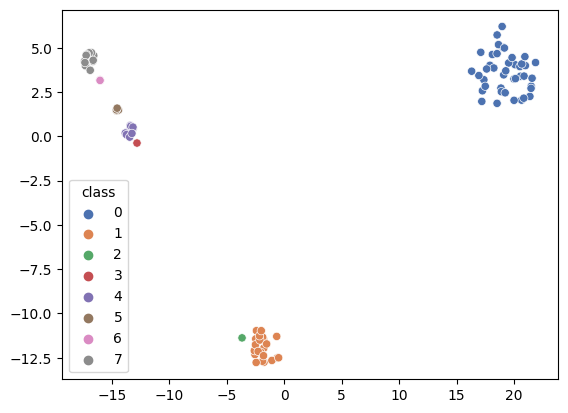

In [ ]:
# Plottimg predicted original values using T-SNE
t_sne_draw(df_knn_og, 2, 20, 0.6)

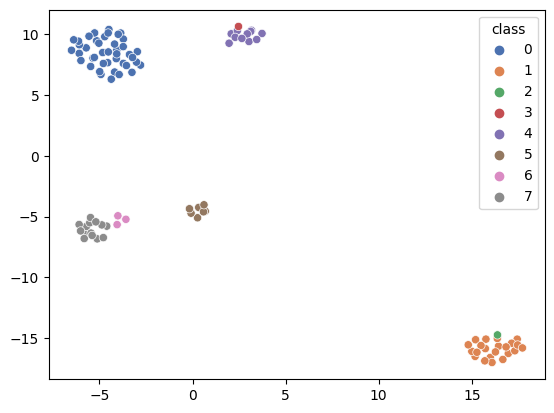

In [ ]:
# Plottimg predicted original values using UMAP
umap_draw(df_knn_og, 2, 20, 0.6)

#Grid search for RF classifier with Borderline SMOTE-1 resampling#

Searching for best parameters

In [ ]:
parameters = {"n_estimators":list(range(100, 200, 25)), "criterion":("gini", "entropy", "log_loss"), "max_depth":list(range(3, 6))}
rf = RandomForestClassifier()

In [ ]:
rfc = GridSearchCV(rf, parameters, n_jobs=4, verbose=3, refit=False, cv=2)

In [ ]:
rfc.fit(X_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 125, 150, 175]},
             refit=False, verbose=3)

In [ ]:
rfc.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 150}

Training using best parameters according to Grid search

In [ ]:
rfc = RandomForestClassifier(**rfc.best_params_)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=150)

Testing on sampled data

In [ ]:
# Predicting values
pred_test_rf = clf.predict(X_test_rf)

In [ ]:
pred_rf = pd.Series(pred_test_rf, name="class")

In [ ]:
# Making dataframe from predicted values
X_test_rf.reset_index(drop=True, inplace=True)
y_pred_rf = pd.DataFrame(pred_rf)
df_rf = pd.concat([X_test_rf, y_pred_rf], axis=1)
df_rf

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class
0,0.571590,0.647197,0.48,0.5,0.465121,0.867439,0.877439,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.670000,0.390000,0.48,0.5,0.360000,0.380000,0.460000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.634619,0.705381,0.48,0.5,0.602309,0.406158,0.391540,0,0,0,...,0,0,0,0,0,0,0,0,0,7
3,0.646634,0.506634,0.48,0.5,0.681878,0.524854,0.321585,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,0.700000,0.710000,0.48,0.5,0.420000,0.840000,0.850000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.510000,0.370000,0.48,0.5,0.350000,0.360000,0.450000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
214,0.360000,0.560000,0.48,0.5,0.430000,0.450000,0.530000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215,0.532974,0.767835,0.48,0.5,0.736217,0.373513,0.402704,0,0,0,...,0,0,0,0,0,0,0,0,0,5
216,0.867426,0.442005,0.48,0.5,0.529431,0.745718,0.746856,0,0,0,...,0,0,0,0,0,0,0,0,0,4


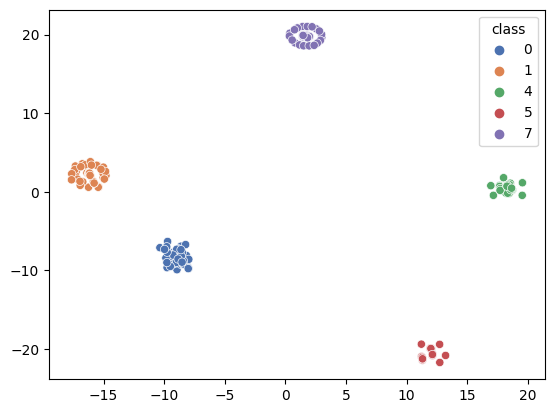

In [ ]:
# Plottimg predicted resampled values using T-SNE
t_sne_draw(df_rf, 2, 30, 0.6)

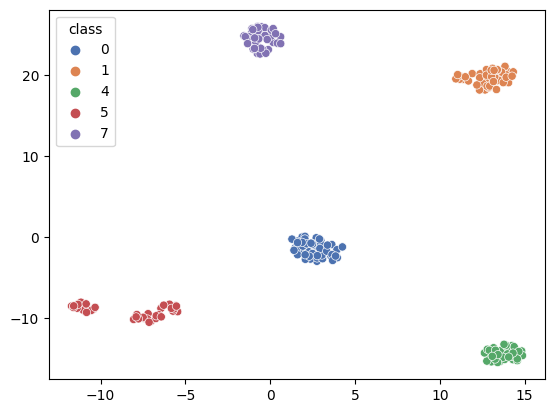

In [ ]:
# Plottimg predicted resampled values using UMAP
umap_draw(df_rf, 2, 30, 0.6)

Testing on original data

In [ ]:
# Predicting values
pred_test_rf = clf.predict(X_test_rf_og)

In [ ]:
pred_rf = pd.Series(pred_test_rf, name="class")

In [ ]:
print(f1_score(pred_test_rf, y_test_rf_og, average="micro"))

0.9504950495049505


In [ ]:
# Making dataframe from predicted values
X_test_rf_og.reset_index(drop=True, inplace=True)
y_pred_rf_og = pd.DataFrame(pred_rf)
df_rf_og = pd.concat([X_test_rf_og, y_pred_rf_og], axis=1)
df_rf_og

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class
0,0.70,0.53,0.48,0.5,0.70,0.86,0.87,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0.40,0.42,0.48,0.5,0.37,0.27,0.27,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.34,0.28,0.48,0.5,0.41,0.35,0.44,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.16,0.51,0.48,0.5,0.33,0.39,0.48,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.72,0.42,0.48,0.5,0.65,0.77,0.79,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.78,0.33,0.48,0.5,0.57,0.77,0.79,0,0,0,...,0,0,0,0,0,0,0,0,0,4
97,0.25,0.37,0.48,0.5,0.43,0.26,0.36,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0.74,0.70,0.48,0.5,0.66,0.65,0.69,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99,0.50,0.57,0.48,0.5,0.71,0.61,0.66,0,0,0,...,0,0,0,0,0,0,0,0,0,1


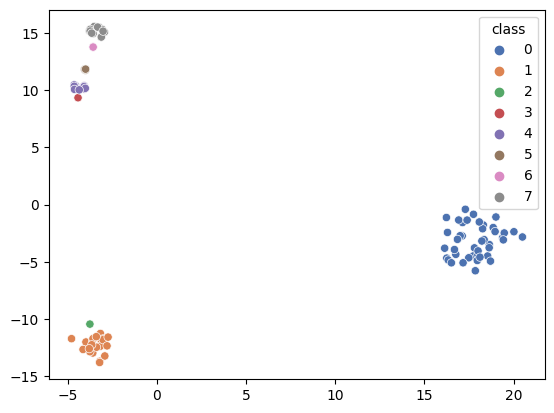

In [ ]:
# Plottimg predicted original values using T-SNE
t_sne_draw(df_rf_og, 2, 20, 0.6)

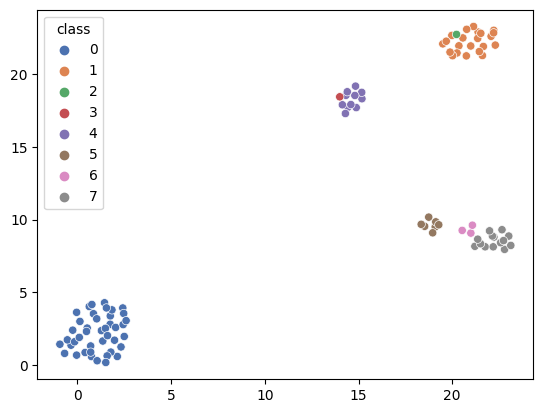

In [ ]:
# Plottimg predicted original values using UMAP
umap_draw(df_rf_og, 2, 20, 0.6)

#Resampling data using Borderline SMOTE-2#

In [ ]:
bsm = BorderlineSMOTE(sampling_strategy="not majority", random_state=42, k_neighbors=1, n_jobs=4, m_neighbors=2, kind="borderline-2")
X_bsm2, y_bsm2 = bsm.fit_resample(df_one_hot.loc[:, df_one_hot.columns != "class"], df_one_hot["class"])

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/filter.py:192: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [ ]:
y_border_smote = pd.DataFrame(y_bsm2)
y_border_smote.reset_index(drop=True, inplace=True)
df_border_smote2 = pd.concat([X_bsm2, y_border_smote], axis=1)
df_border_smote2

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class
0,0.490000,0.290000,0.48,0.5,0.560000,0.240000,0.350000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.070000,0.400000,0.48,0.5,0.540000,0.350000,0.440000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.560000,0.400000,0.48,0.5,0.490000,0.370000,0.460000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.590000,0.490000,0.48,0.5,0.520000,0.450000,0.360000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.230000,0.320000,0.48,0.5,0.550000,0.250000,0.350000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,0.653693,0.715433,0.48,0.5,0.569728,0.476249,0.321740,0,0,0,...,0,0,0,0,0,0,0,0,0,7
717,0.626762,0.707677,0.48,0.5,0.598944,0.400141,0.390774,0,0,0,...,0,0,0,0,0,0,0,0,0,7
718,0.628359,0.625145,0.48,0.5,0.621052,0.467075,0.412983,0,0,0,...,0,0,0,0,0,0,0,0,0,7
719,0.545051,0.623505,0.48,0.5,0.555103,0.428196,0.338454,0,0,0,...,0,0,0,0,0,0,0,0,0,7


In [ ]:
# Counting amount of each class
df_border_smote2["class"].value_counts()

0    143
5    143
1    142
4    142
7    142
6      5
3      2
2      2
Name: class, dtype: int64

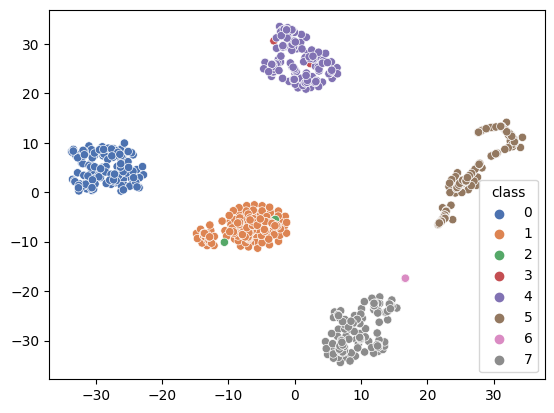

In [ ]:
# Plottimg resampled values using T-SNE
t_sne_draw(df_border_smote2, 2, 30, 0.6)

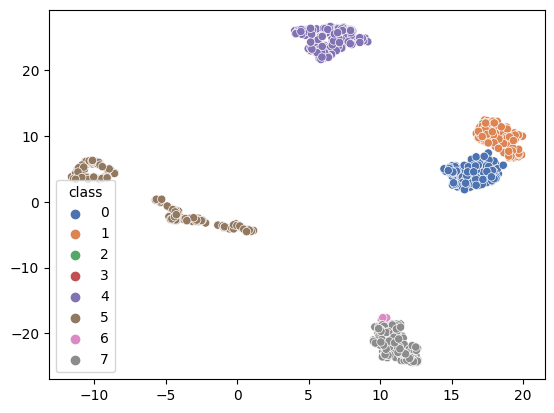

In [ ]:
# Plottimg resampled values using UMAP
umap_draw(df_border_smote2, 2, 30, 0.6)

#Grid search for SVM classifier with Borderline SMOTE-2 resampling#

Searching for best parameters

In [ ]:
# Separating on test and train
X_train, X_test, y_train, y_test = train_test_split(df_border_smote2.loc[:, df_border_smote2.columns != "class"], df_border_smote2["class"],
                                                    test_size=0.3, shuffle=True)


# SVM
X_test_svm = X_test
y_test_svm = y_test

# KNN
X_test_knn = X_test
y_test_knn = y_test

# RF
X_test_rf = X_test
y_test_rf = y_test

In [ ]:
parameters = {"kernel":("linear", "rbf", "sigmoid", "poly"), "C":list(range(1, 11)), "class_weight": [None, "balanced"]}
scoring = ['accuracy','f1_macro', 'recall']
svc = svm.SVC()

In [ ]:
clf = GridSearchCV(svc, parameters, n_jobs=4, verbose=3, refit=False, cv=2)

In [ ]:
clf.fit(X_train, y_train)

Fitting 2 folds for each of 80 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


GridSearchCV(cv=2, estimator=SVC(), n_jobs=4,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'class_weight': [None, 'balanced'],
                         'kernel': ('linear', 'rbf', 'sigmoid', 'poly')},
             refit=False, verbose=3)

In [ ]:
clf.best_params_

{'C': 10, 'class_weight': None, 'kernel': 'rbf'}

Training using best parameters according to Grid search

In [ ]:
# Creating and training classifier with linear kernel
clf = svm.SVC(**clf.best_params_)
clf.fit(X_train, y_train)

SVC(C=10)

Testing on sampled data

In [ ]:
# Predicting values
pred_test_svm = clf.predict(X_test_svm)

In [ ]:
pred_svm = pd.Series(pred_test_svm, name="class")

In [ ]:
# Making dataframe from predicted values
X_test_svm.reset_index(drop=True, inplace=True)
y_pred_svm = pd.DataFrame(pred_svm)
df_svm = pd.concat([X_test_svm, y_pred_svm], axis=1)
df_svm

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class
0,0.542293,0.596026,0.48,0.5,0.693733,0.629520,0.676267,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.520000,0.570000,0.48,0.5,0.420000,0.470000,0.540000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.766100,0.612401,0.48,0.5,0.506100,0.752700,0.743900,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0.680000,0.490000,1.00,0.5,0.620000,0.550000,0.280000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.670000,0.610000,0.48,0.5,0.510000,0.370000,0.380000,0,0,0,...,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,0.300000,0.450000,0.48,0.5,0.360000,0.210000,0.320000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213,0.600000,0.460000,0.48,0.5,0.450000,0.810000,0.830000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
214,0.763708,0.650669,0.48,0.5,0.503708,0.735957,0.746292,0,0,0,...,0,0,0,0,0,0,0,0,0,4
215,0.796762,0.437910,0.48,0.5,0.417445,0.658852,0.671407,0,0,0,...,0,0,0,0,0,0,0,0,0,4


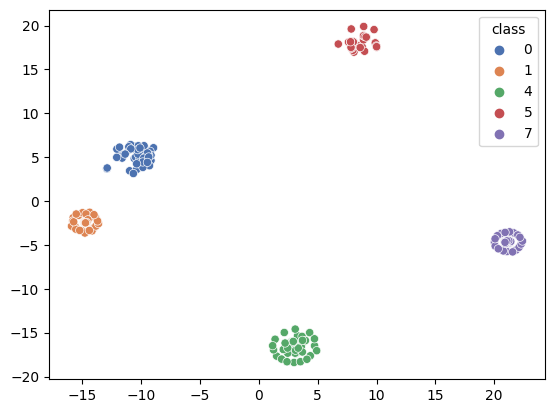

In [ ]:
# Plottimg predicted resampled values using T-SNE
t_sne_draw(df_svm, 2, 30, 0.6)

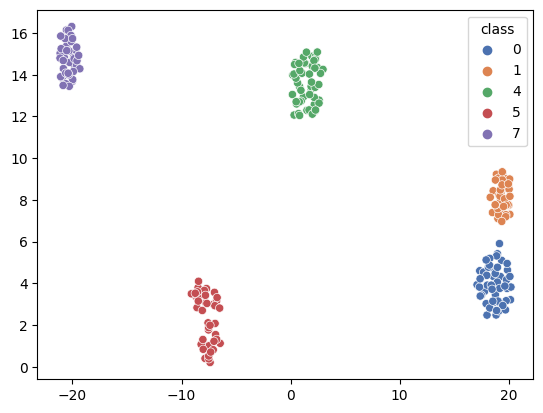

In [ ]:
# Plottimg predicted resampled values using UMAP
umap_draw(df_svm, 2, 30, 0.6)

In [ ]:
# Making dataframe from training values
X_test.reset_index(drop=True, inplace=True)
y_test_ = pd.DataFrame(y_test)
y_test_.reset_index(drop=True, inplace=True)
df_test = pd.concat([X_test, y_test_], axis=1)
df_test

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class
0,0.542293,0.596026,0.48,0.5,0.693733,0.629520,0.676267,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.520000,0.570000,0.48,0.5,0.420000,0.470000,0.540000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.766100,0.612401,0.48,0.5,0.506100,0.752700,0.743900,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0.680000,0.490000,1.00,0.5,0.620000,0.550000,0.280000,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,0.670000,0.610000,0.48,0.5,0.510000,0.370000,0.380000,0,0,0,...,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,0.300000,0.450000,0.48,0.5,0.360000,0.210000,0.320000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213,0.600000,0.460000,0.48,0.5,0.450000,0.810000,0.830000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
214,0.763708,0.650669,0.48,0.5,0.503708,0.735957,0.746292,0,0,0,...,0,0,0,0,0,0,0,0,0,4
215,0.796762,0.437910,0.48,0.5,0.417445,0.658852,0.671407,0,0,0,...,0,0,0,0,0,0,0,0,0,4


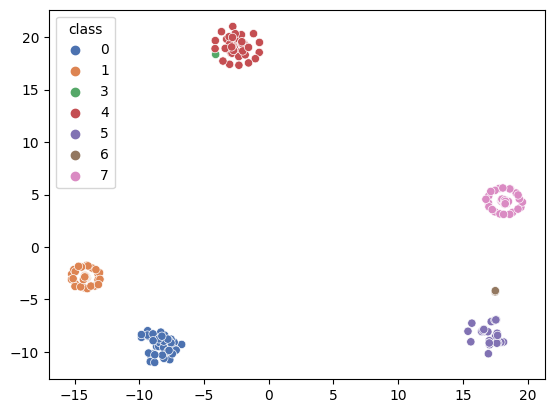

In [ ]:
# Plottimg test resampled values using T-SNE
t_sne_draw(df_test, 2, 30, 0.6)

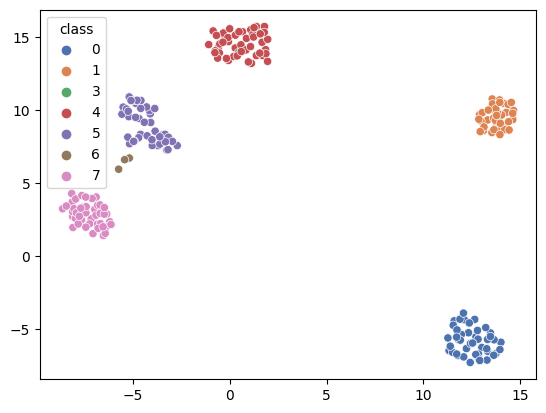

In [ ]:
# Plottimg test resampled values using UMAP
umap_draw(df_test, 2, 30, 0.6)

Testing on original data

In [ ]:
# Predicting values
pred_test_svm = clf.predict(X_test_svm_og)

In [ ]:
pred_svm = pd.Series(pred_test_svm, name="class")

In [ ]:
print(f1_score(pred_test_svm, y_test_svm_og, average="micro"))

0.9405940594059405


In [ ]:
# Making dataframe from predicted values
X_test_svm_og.reset_index(drop=True, inplace=True)
y_pred_svm_og = pd.DataFrame(pred_svm)
df_svm_og = pd.concat([X_test_svm_og, y_pred_svm_og], axis=1)
df_svm_og

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class
0,0.70,0.53,0.48,0.5,0.70,0.86,0.87,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0.40,0.42,0.48,0.5,0.37,0.27,0.27,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.34,0.28,0.48,0.5,0.41,0.35,0.44,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.16,0.51,0.48,0.5,0.33,0.39,0.48,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.72,0.42,0.48,0.5,0.65,0.77,0.79,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.78,0.33,0.48,0.5,0.57,0.77,0.79,0,0,0,...,0,0,0,0,0,0,0,0,0,4
97,0.25,0.37,0.48,0.5,0.43,0.26,0.36,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0.74,0.70,0.48,0.5,0.66,0.65,0.69,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99,0.50,0.57,0.48,0.5,0.71,0.61,0.66,0,0,0,...,0,0,0,0,0,0,0,0,0,1


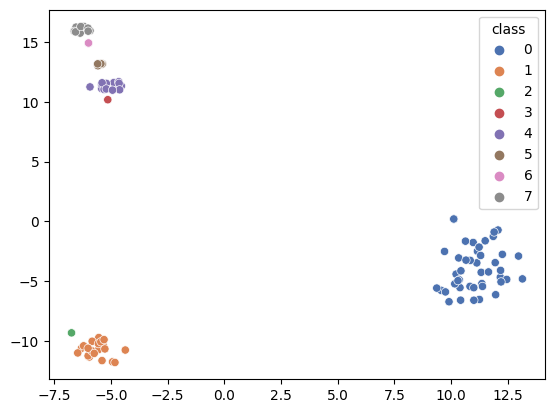

In [ ]:
# Plottimg predicted original values using T-SNE
t_sne_draw(df_svm_og, 2, 20, 0.6)

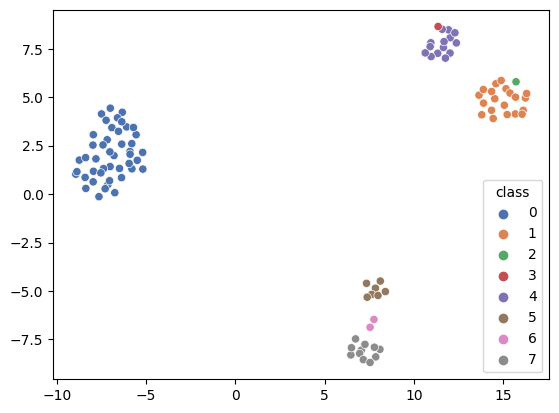

In [ ]:
# Plottimg predicted original values using UMAP
umap_draw(df_svm_og, 2, 20, 0.6)

#Grid search for KNN classifier with Borderline SMOTE-2 resampling#

Searching for best parameters

In [ ]:
parameters = {"n_neighbors":list(range(5, 30)), "algorithm":("brute", "kd_tree", "ball_tree"),
              "metric":["minkowski", "manhattan", "euclidean"]}

kneigh = KNeighborsClassifier()

In [ ]:
neigh = GridSearchCV(kneigh, parameters, n_jobs=4, verbose=3, refit=False, cv=2)

In [ ]:
neigh.fit(X_train, y_train)

Fitting 2 folds for each of 225 candidates, totalling 450 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'algorithm': ('brute', 'kd_tree', 'ball_tree'),
                         'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                         26, 27, 28, 29]},
             refit=False, verbose=3)

In [ ]:
neigh.best_params_

{'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 5}

Training using best parameters according to Grid search

In [ ]:
neigh = KNeighborsClassifier(**neigh.best_params_)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute')

Testing on sampled data

In [ ]:
# Predicting values
pred_neigh = clf.predict(X_test_knn)

In [ ]:
pred_knn = pd.Series(pred_neigh, name="class")

In [ ]:
# Making dataframe from predicted values
X_test_knn.reset_index(drop=True, inplace=True)
y_pred_knn = pd.DataFrame(pred_knn)
df_knn = pd.concat([X_test_knn, y_pred_knn], axis=1)
df_knn

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class
0,0.542293,0.596026,0.48,0.5,0.693733,0.629520,0.676267,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.520000,0.570000,0.48,0.5,0.420000,0.470000,0.540000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.766100,0.612401,0.48,0.5,0.506100,0.752700,0.743900,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0.680000,0.490000,1.00,0.5,0.620000,0.550000,0.280000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.670000,0.610000,0.48,0.5,0.510000,0.370000,0.380000,0,0,0,...,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,0.300000,0.450000,0.48,0.5,0.360000,0.210000,0.320000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213,0.600000,0.460000,0.48,0.5,0.450000,0.810000,0.830000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
214,0.763708,0.650669,0.48,0.5,0.503708,0.735957,0.746292,0,0,0,...,0,0,0,0,0,0,0,0,0,4
215,0.796762,0.437910,0.48,0.5,0.417445,0.658852,0.671407,0,0,0,...,0,0,0,0,0,0,0,0,0,4


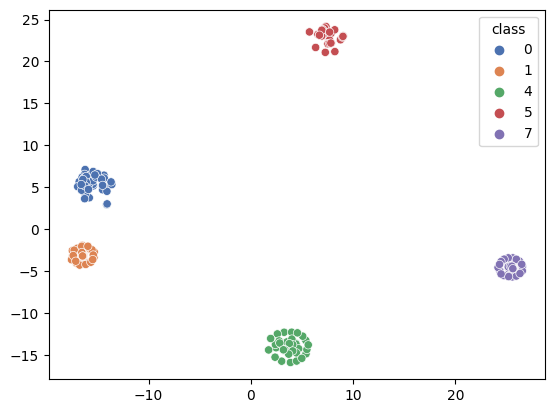

In [ ]:
# Plottimg predicted resampled values using T-SNE
t_sne_draw(df_knn, 2, 30, 0.6)

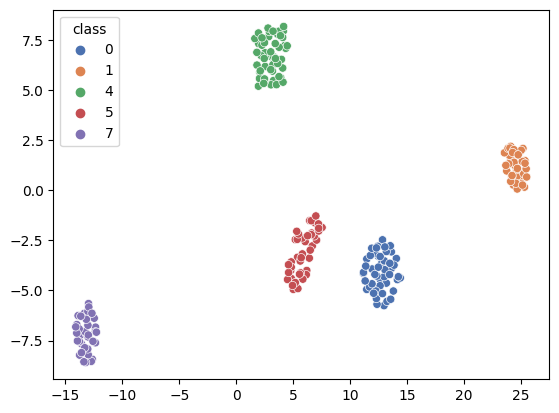

In [ ]:
# Plottimg predicted resampled values using UMAP
umap_draw(df_knn, 2, 30, 0.6)

Testing on original data

In [ ]:
# Predicting values
pred_neigh = clf.predict(X_test_knn_og)

In [ ]:
pred_knn = pd.Series(pred_neigh, name="class")

In [ ]:
print(f1_score(pred_neigh, y_test_knn_og, average="micro"))

0.9405940594059405


In [ ]:
# Making dataframe from predicted values
X_test_knn_og.reset_index(drop=True, inplace=True)
y_pred_knn_og = pd.DataFrame(pred_knn)
df_knn_og = pd.concat([X_test_knn_og, y_pred_knn_og], axis=1)
df_knn_og

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class
0,0.70,0.53,0.48,0.5,0.70,0.86,0.87,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0.40,0.42,0.48,0.5,0.37,0.27,0.27,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.34,0.28,0.48,0.5,0.41,0.35,0.44,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.16,0.51,0.48,0.5,0.33,0.39,0.48,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.72,0.42,0.48,0.5,0.65,0.77,0.79,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.78,0.33,0.48,0.5,0.57,0.77,0.79,0,0,0,...,0,0,0,0,0,0,0,0,0,4
97,0.25,0.37,0.48,0.5,0.43,0.26,0.36,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0.74,0.70,0.48,0.5,0.66,0.65,0.69,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99,0.50,0.57,0.48,0.5,0.71,0.61,0.66,0,0,0,...,0,0,0,0,0,0,0,0,0,1


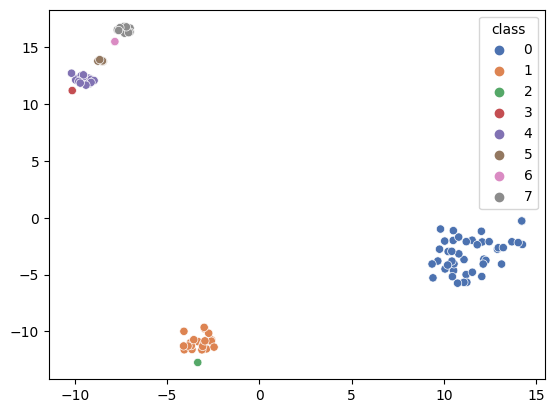

In [ ]:
# Plottimg predicted original values using T-SNE
t_sne_draw(df_knn_og, 2, 20, 0.6)

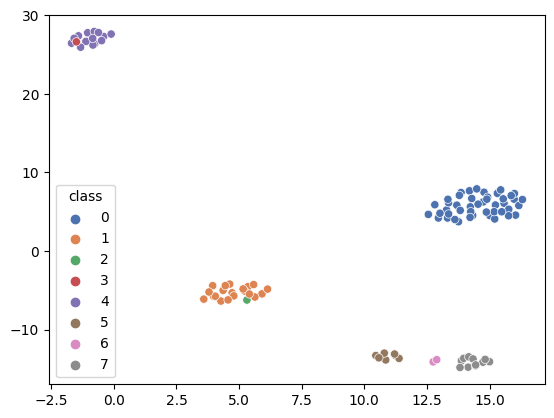

In [ ]:
# Plottimg predicted original values using UMAP
umap_draw(df_knn_og, 2, 20, 0.6)

#Grid search for RF classifier with Borderline SMOTE-2 resampling#

Searching for best parameters

In [ ]:
parameters = {"n_estimators":list(range(100, 200, 25)), "criterion":("gini", "entropy", "log_loss"), "max_depth":list(range(3, 6))}
rf = RandomForestClassifier()

In [ ]:
rfc = GridSearchCV(rf, parameters, n_jobs=4, verbose=3, refit=False, cv=2)

In [ ]:
rfc.fit(X_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 125, 150, 175]},
             refit=False, verbose=3)

In [ ]:
rfc.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 175}

Training using best parameters according to Grid search

In [ ]:
rfc = RandomForestClassifier(**rfc.best_params_)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=175)

Testing on sampled data

In [ ]:
# Predicting values
pred_test_rf = clf.predict(X_test_rf)

In [ ]:
pred_rf = pd.Series(pred_test_rf, name="class")

In [ ]:
# Making dataframe from predicted values
X_test_rf.reset_index(drop=True, inplace=True)
y_pred_rf = pd.DataFrame(pred_rf)
df_rf = pd.concat([X_test_rf, y_pred_rf], axis=1)
df_rf

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class
0,0.542293,0.596026,0.48,0.5,0.693733,0.629520,0.676267,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.520000,0.570000,0.48,0.5,0.420000,0.470000,0.540000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.766100,0.612401,0.48,0.5,0.506100,0.752700,0.743900,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0.680000,0.490000,1.00,0.5,0.620000,0.550000,0.280000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.670000,0.610000,0.48,0.5,0.510000,0.370000,0.380000,0,0,0,...,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,0.300000,0.450000,0.48,0.5,0.360000,0.210000,0.320000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213,0.600000,0.460000,0.48,0.5,0.450000,0.810000,0.830000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
214,0.763708,0.650669,0.48,0.5,0.503708,0.735957,0.746292,0,0,0,...,0,0,0,0,0,0,0,0,0,4
215,0.796762,0.437910,0.48,0.5,0.417445,0.658852,0.671407,0,0,0,...,0,0,0,0,0,0,0,0,0,4


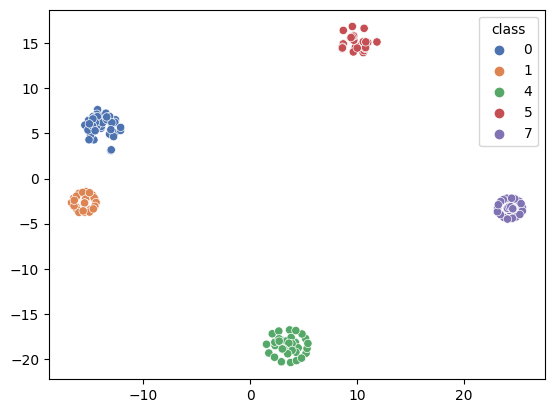

In [ ]:
# Plottimg predicted resampled values using T-SNE
t_sne_draw(df_rf, 2, 30, 0.6)

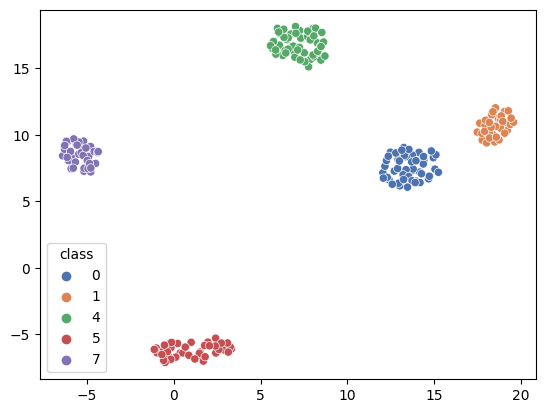

In [ ]:
# Plottimg predicted resampled values using UMAP
umap_draw(df_rf, 2, 30, 0.6)

Testing on original data

In [ ]:
# Predicting values
pred_test_rf = clf.predict(X_test_rf_og)

In [ ]:
pred_rf = pd.Series(pred_test_rf, name="class")

In [ ]:
print(f1_score(pred_test_rf, y_test_rf_og, average="micro"))

0.9405940594059405


In [ ]:
# Making dataframe from predicted values
X_test_rf_og.reset_index(drop=True, inplace=True)
y_pred_rf_og = pd.DataFrame(pred_rf)
df_rf_og = pd.concat([X_test_rf_og, y_pred_rf_og], axis=1)
df_rf_og

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class
0,0.70,0.53,0.48,0.5,0.70,0.86,0.87,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0.40,0.42,0.48,0.5,0.37,0.27,0.27,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.34,0.28,0.48,0.5,0.41,0.35,0.44,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.16,0.51,0.48,0.5,0.33,0.39,0.48,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.72,0.42,0.48,0.5,0.65,0.77,0.79,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.78,0.33,0.48,0.5,0.57,0.77,0.79,0,0,0,...,0,0,0,0,0,0,0,0,0,4
97,0.25,0.37,0.48,0.5,0.43,0.26,0.36,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0.74,0.70,0.48,0.5,0.66,0.65,0.69,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99,0.50,0.57,0.48,0.5,0.71,0.61,0.66,0,0,0,...,0,0,0,0,0,0,0,0,0,1


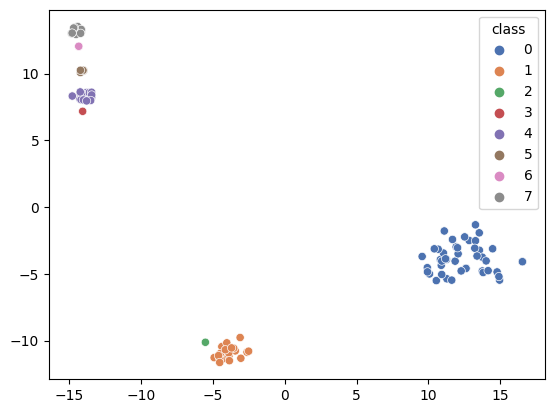

In [ ]:
# Plottimg predicted original values using T-SNE
t_sne_draw(df_rf_og, 2, 20, 0.6)

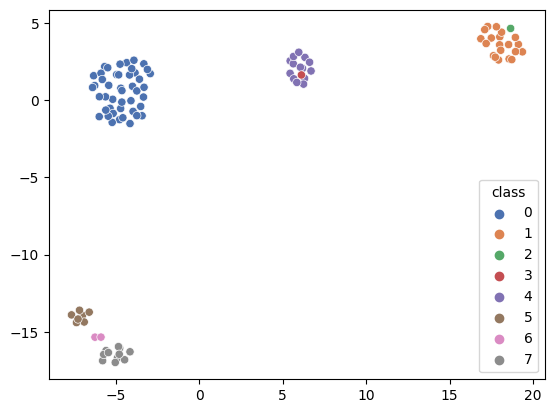

In [ ]:
# Plottimg predicted original values using UMAP
umap_draw(df_rf_og, 2, 20, 0.6)